<a href="https://colab.research.google.com/github/futurebly/Web-AI/blob/main/Day16~20_%EB%94%A5%EB%9F%AC%EB%8B%9D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 판다스로 데이터 확인
- 레모네이드 : https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv
- 보스턴 : https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv
- 아이리스 : https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv

In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv'
lemon = pd.read_csv(path)
print(lemon.shape)
lemon.head()

(6, 2)


,온도,판매량
0,20,40
1,21,42
2,22,44
3,23,46
4,24,48


In [ ]:
독립 = lemon[['온도']]
종속 = lemon[['판매량']]
print(독립.shape, 종속.shape)
print(독립.head(2))
print(종속.head(2))

(6, 1) (6, 1)
   온도
0  20
1  21
   판매량
0   40
1   42


In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv'
boston = pd.read_csv(path)
print(boston.shape)
boston.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
독립 = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']] # 독립 = boston.drop(['medv'], axis=1
종속 = boston[['medv']]
print(독립.shape, 종속.shape)
print(독립.head(2))
print(종속.head(2))

(506, 13) (506, 1)
      crim    zn  indus  chas    nox  ...  rad  tax  ptratio      b  lstat
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.9   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.9   9.14

[2 rows x 13 columns]
   medv
0  24.0
1  21.6


In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv'
iris = pd.read_csv(path)
print(iris.shape)
iris.head()

(150, 5)


,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.columns

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종'], dtype='object')

In [ ]:
독립 = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
종속 = iris[['품종']]
print(독립.shape, 종속.shape)
print(독립.head(2))
print(종속.head(2))

(150, 4) (150, 1)
   꽃잎길이  꽃잎폭  꽃받침길이  꽃받침폭
0   5.1  3.5    1.4   0.2
1   4.9  3.0    1.4   0.2
       품종
0  setosa
1  setosa


## 첫번째 딥러닝 - 레모네이드 판매 예측
- https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv

In [ ]:
#데이터를 준비한다
import tensorflow as tf
import pandas as ad

path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv'
lemon = pd.read_csv(path)

x_lemon = lemon[['온도']]
y_lemon = lemon[['판매량']]
print(x_lemon.shape, y_lemon.shape)

(6, 1) (6, 1)


In [ ]:
#모델을 생성한다
X = tf.keras.layers.Input(shape=1)
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [ ]:
#모델을 학습한다
model.fit(x_lemon, y_lemon, epochs=1000, verbose=0) #verbose수다쟁이, 조용히 학습해라
model.fit(x_lemon, y_lemon, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 10ms/step - loss: 2.7070e-04
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 2.7061e-04
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 2.7051e-04
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 2.7046e-04
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 2.7038e-04
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 2.7031e-04
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 2.7018e-04
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 2.7006e-04
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 2.6993e-04
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 2.6970e-04


In [ ]:
#모델을 이용한다
model.predict(x_lemon)

array([[40.00704 ],
       [41.99986 ],
       [43.992676],
       [45.985497],
       [47.978313],
       [49.971134]], dtype=float32)

In [ ]:
model.get_weights()

[array([[1.9928187]], dtype=float32), array([0.15066382], dtype=float32)]

In [ ]:
#판매량 = 0.9290964 * 온도 + 1.1820884

In [ ]:
#판매량 = 1.9928187 * 온도 + 0.15066382 #수천번 학습 후

## 두번째 딥러닝 - 보스턴 집값 예측
- https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv

In [ ]:
#데이터를 준비
import tensorflow as tf
import pandas as pd

path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv'
boston = pd.read_csv(path)
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
x_boston = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
y_boston = boston[['medv']]
print(x_boston.shape, y_boston.shape)

(506, 13) (506, 1)


In [ ]:
#모델을 생성
X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


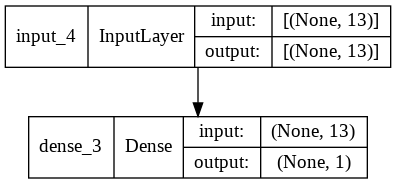

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#모델을 학습
model.fit(x_boston, y_boston, epochs=1000, verbose=0)
model.fit(x_boston, y_boston, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 24.2354
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 24.0446
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 24.4826
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 24.1318
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 24.8598
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 24.2489
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 24.2984
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 23.9615
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 24.0248
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 24.1233


In [ ]:
#모델을 이용
model.predict(x_boston[:5]) #slicing을 하기때메 []대괄호 한번

array([[30.363287],
       [25.123318],
       [31.704601],
       [30.372547],
       [30.017658]], dtype=float32)

In [ ]:
model.predict([[1,2,3,4,5,6,7,8,9,10,11,12,13]]) #직접 숫자를 넣을때는 [[]]대괄호 두번

array([[37.18771]], dtype=float32)

In [ ]:
model.predict([[1,2,3,4,5,6,7,8,9,10,11,12,13],
               [1,2,3,4,5,6,7,8,9,10,11,12,23],
               [1,2,3,4,5,6,7,8,9,10,11,12,33]
               ])

array([[37.18771 ],
       [32.270042],
       [27.352379]], dtype=float32)

In [ ]:
model.get_weights()

[array([[-0.09400858],
        [ 0.04892354],
        [-0.02681748],
        [ 2.657233  ],
        [ 0.08154692],
        [ 5.3763504 ],
        [-0.01083029],
        [-1.0144763 ],
        [ 0.18967697],
        [-0.00980105],
        [-0.4688538 ],
        [ 0.01444097],
        [-0.4578764 ]], dtype=float32), array([5.440677], dtype=float32)]

In [ ]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

## 세번째 딥러닝 - 아이리스 품종 분류
- https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv


In [ ]:
# 데이터를 준비
import pandas as pd
import tensorflow as tf

path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv'
iris = pd.read_csv(path)
iris = pd.get_dummies(iris)
iris.columns

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')

In [ ]:
x_iris = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
y_iris = iris[['품종_setosa', '품종_versicolor', '품종_virginica']]

print(x_iris.shape, y_iris.shape)
print(x_iris.head(1))
print(y_iris.head(1))

(150, 4) (150, 3)
   꽃잎길이  꽃잎폭  꽃받침길이  꽃받침폭
0   5.1  3.5    1.4   0.2
   품종_setosa  품종_versicolor  품종_virginica
0          1              0             0


In [ ]:
# 모델을 준비
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(3, activation="softmax")(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy') #loss만으로는 정확도 예측이 어렵기때메 accuracy 추가

In [ ]:
# 모델에 데이터 학습시키기
model.fit(x_iris, y_iris, epochs=100, verbose=0)
model.fit(x_iris, y_iris, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9800
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1447 - accuracy: 0.9800
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9867
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9867
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9800
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9800
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9733
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9800
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1443 - accuracy: 0.9800
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1437 - accuracy: 0.9800


In [ ]:
# 모델 이용
sample = x_iris.sample(5)
pred = model.predict(sample)

In [ ]:
sample

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭
36,5.5,3.5,1.3,0.2
46,5.1,3.8,1.6,0.2
139,6.9,3.1,5.4,2.1
111,6.4,2.7,5.3,1.9
62,6.0,2.2,4.0,1.0


In [ ]:
pred

array([[9.9953294e-01, 4.6709625e-04, 4.3732111e-09],
       [9.9962819e-01, 3.7182332e-04, 1.0233803e-08],
       [6.3408368e-07, 2.4456643e-01, 7.5543290e-01],
       [4.0790712e-07, 1.7586607e-01, 8.2413352e-01],
       [6.5575691e-04, 9.4370979e-01, 5.5634450e-02]], dtype=float32)

In [ ]:
sample.index

Int64Index([36, 46, 139, 111, 62], dtype='int64')

In [ ]:
y_iris.loc[sample.index, :]
#y_iris.loc[[36,46,139,111,62], :]

,품종_setosa,품종_versicolor,품종_virginica
36,1,0,0
46,1,0,0
139,0,0,1
111,0,0,1
62,0,1,0


In [ ]:
#수식 확인
model.get_weights()

[array([[ 0.5954092 ,  0.76737475, -0.9241416 ],
        [ 3.119437  , -0.12402771, -1.0467147 ],
        [-3.4345782 , -0.72253436,  1.5391753 ],
        [-5.233304  , -1.0891954 ,  1.7700865 ]], dtype=float32),
 array([ 2.3551364 ,  0.73846596, -1.8196614 ], dtype=float32)]

In [ ]:
#setosa = 0.5954092*x1 + 3.119437*x2 + -3.4345782*x3 + -5.233304*x4 + 2.3551364
#versicolor = 
#virginica = 

## 네번째 딥러닝 - 히든레이어
- https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv
-  https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv

In [ ]:
# 데이터 준비
import pandas as pd
import tensorflow as tf

boston = pd.read_csv('https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv')
print(boston.columns)
x_boston = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
y_boston = boston[['medv']]
print(x_boston.shape, y_boston.shape)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 13) (506, 1)


In [ ]:
# 모델 준비
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(5, activation='swish')(X)
H = tf.keras.layers.Dense(5, activation='swish')(H)
H = tf.keras.layers.Dense(5, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_3 (Dense)             (None, 5)                 70        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델을 데이터로 학습
model.fit(x_boston, y_boston, epochs=1000, verbose=0)
model.fit(x_boston, y_boston, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 11.8274
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 11.3116
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 10.6637
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 11.5991
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 12.0477
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 11.5037
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 12.4697
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 11.3102
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 11.2978
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 11.1222


In [ ]:
# 모델을 이용
sample = x_boston.sample(5)
sample

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08
383,7.99248,0.0,18.10,0,0.700,5.520,100.0,1.5331,24,666,20.2,396.90,24.56
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,394.92,6.78
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [ ]:
pred = model.predict(x_boston[:5])
pred

ValueError: ignored

### 아이리스 인공신경망


In [ ]:
import pandas as pd
import tensorflow as tf

#데이터 준비
iris = pd.read_csv('https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv')
iris = pd.get_dummies(iris)
print(iris.columns)

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')


In [ ]:
x_iris = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
y_iris = iris[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(x_iris.shape, y_iris.shape)

(150, 4) (150, 3)


In [ ]:
#모델 생성
X = tf.keras.layers.Input(shape=[4])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(3, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_8 (Dense)             (None, 8)                 40        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 3)                 27        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 학습
model.fit(x_iris, y_iris, epochs=100, verbose=0)
model.fit(x_iris, y_iris, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9733
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.1032 - accuracy: 0.9533
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9733
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9600
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9667
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9733
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9600
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9667
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9733
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.9667


In [ ]:
#모델 이용


## 딥러닝 예제

In [ ]:
import tensorflow as tf

x_train = [[0,0],
           [0,1],
           [1,0],
           [1,1]]
y_train = [[0],
           [0],
           [0],
           [1]]

In [ ]:
X = tf.keras.layers.Input(shape=[2])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(1, activation='sigmoid')(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model.fit(x_train, y_train, epochs=1000, verbose=0)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4829 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4824 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4822 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4819 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4817 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4815 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.4814 - accuracy: 1.0000


In [ ]:
import tensorflow as tf

x_train = [[0, 0], #AND
           [0, 1],
           [1, 0],
           [1, 1]]
y_train = [[0, 0],
           [0, 1],
           [0, 1],
           [1, 1]]

In [ ]:
X = tf.keras.layers.Input(shape=[2])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(2, activation='sigmoid')(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='binary_crossentropy', metrics='binary_accuracy')

In [ ]:
model.fit(x_train, y_train, epochs=1000, verbose=0)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0068 - binary_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 0.0067 - binary_accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 0

### 덧셈

In [ ]:
# 데이터 준비하기
x_input = [
    [1, 2],
    [1, 5],
    [2, 2],
    [2, 9],
    [3, 1],
    [3, 7],
    [4, 3],
    [4, 8],
    [5, 8],
    [5, 3],
    [6, 5],
    [6, 9],
    [7, 3],
    [7, 1],
    [8, 5],
    [8, 8],
    [9, 4],
    [9, 3],
]
y_label = [[sum(e)] for e in x_input]
y_label

[[3],
 [6],
 [4],
 [11],
 [4],
 [10],
 [7],
 [12],
 [13],
 [8],
 [11],
 [15],
 [10],
 [8],
 [13],
 [16],
 [13],
 [12]]

In [ ]:
X = tf.keras.layers.Input(shape=[2])
H = tf.keras.layers.Dense(8, activation="swish")(X)
H = tf.keras.layers.Dense(8, activation="swish")(H)
H = tf.keras.layers.Dense(8, activation="swish")(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse", metrics="accuracy")

In [ ]:
model.fit(x_input, y_label, epochs=1000, verbose=0)
model.fit(x_input, y_label, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 0.0000e+00

In [ ]:
model.predict([[12, 11]])

array([[22.570374]], dtype=float32)

# 함수형의 의미
- 절차형 프로그래밍 (C언어)
- 객체지향형 프로그래밍 (C++, 자바) : 많은 사람이 협업이 가능하고 남의 코드 따다 오기 쉽게 됨
- 함수형 프로그래밍 (C++, 자바도 발전했고 새로운 언어들 대부분 다 가능) : 다량의 데이터를 한꺼번에 다루기 시작하면서 탄생. 데이터를 그대로 두고 함수만 보낼 수 있게 됨. 병렬 구조가 가능. 연쇄 함수가 도입된 측면도 있음. => 데이터에 함수를 적용한다는 개념


In [ ]:
def add(a, b):
  return a + b
print(add(1,3))
print(type(add))

4
<class 'function'>


In [ ]:
number = 1
print(number)
print(type(number))

1
<class 'int'>


In [ ]:
def add(a, b):
  return a + b

def minus(a, b):
  return a - b

def func(f, a, b):
  return f(a, b)

print(func(add, 3, 2))
print(func(minus, 3, 2))

5
1


# lambda 함수
- 이름 없이 간단한 함수를 만든다. 익명 함수.

In [ ]:
# lambda 1

add = lambda a, b: a + b
minus = lambda a, b: a - b
def func(f, a, b):
  return f(a, b)

print(func(add, 3, 2))
print(func(minus, 3, 2))

print(func(lambda a, b: a* b, 3, 2))
print(func(lambda a, b: a / b, 3, 2))

5
1
6
1.5


In [ ]:
# lambda 2

def get_func(what='add'):
  if what == 'minus':
    return lambda a, b: a - b
 
  return lambda a, b : a + b

print(get_func('add')(1,3))
print(get_func('minus')(1,3))


4
-2


In [ ]:
print(get_func('mult')(1,3))

4


In [ ]:
a = 'abac'
print(dir(a))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [ ]:
b = [1,2,3]
print(dir(b))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [ ]:
print(a.count('a'))
print(b.count(1))

2
1


In [ ]:
users = [
    ['이숙번', 70, 80, 90],
    ['이고잉', 82, 85, 83],
    ['강두루', 56, 91, 90],
]

sorted(users, key=lambda x: sum(x[1:]), reverse=True)

[['이고잉', 82, 85, 83], ['이숙번', 70, 80, 90], ['강두루', 56, 91, 90]]

# 딥러닝 # 02

# 보스턴 집값 예측 모델

In [ ]:
import tensorflow as tf
import pandas as pd

boston = pd.read_csv('https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv')
print(boston.columns)
x_boston = boston.drop(['medv'], axis=1)
y_boston = boston[['medv']]
print(x_train.shape, y_train.shape)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(400, 13) (400, 1)


In [ ]:
X = tf.keras.Input(shape=[13])
H = tf.keras.layers.Dense(8, activation='swish')(X)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.Model(X, Y)
model.compile(loss='mse')


# X = tf.keras.layers.Input(shape=[13])
# H = tf.keras.layers.Dense(8, activation=tf.keras.activations.)(X)
# Y = tf.keras.layers.Dense(1)(H)

# model = tf.keras.models.Model(X, Y)
# model.compile(loss=tf.keras.losses.mse)

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 2ms/step - loss: 4282.4980
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 1361.2657
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 804.6667
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 496.1468
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 295.2938
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 195.9659
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 165.5000
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 146.2592
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 135.5525
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 125.1962


In [ ]:
model.compile(loss=tf.keras.losses.MSE)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 376.7414
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 225.5289
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 179.2685
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 161.4532
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 145.9648
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 132.4031
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 127.7988
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 112.9351
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 108.2488
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 96.8570


In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 92.0813
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 85.2191
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 80.1986
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 75.8351
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 72.0781
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 67.9802
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 67.8822
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 63.4464
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 60.9698
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 59.3958


### Train / Validation / Test
- train : 학습용
- validation : 모의고사용
- test : 최종면접

보통 7:1:2 정도로 나눔

In [ ]:
x_train.shape

(506, 13)

In [ ]:
x_train, x_test = x_boston[:400], x_boston[400:]
y_train, y_test = y_boston[:400], y_boston[400:]
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(400, 13) (106, 13)
(400, 1) (106, 1)


In [ ]:
result = model.fit(x_train, y_train, epochs=500, validation_split=0.2)

Epoch 1/500
10/10 [==============================] - 0s 22ms/step - loss: 105.7942 - val_loss: 238.1550
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 91.3651 - val_loss: 292.8460
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 79.9425 - val_loss: 473.5901
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 79.5462 - val_loss: 448.3982
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 72.9154 - val_loss: 734.8892
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: 65.4494 - val_loss: 789.5706
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 61.6778 - val_loss: 619.4666
Epoch 8/500
10/10 [==============================] - 0s 6ms/step - loss: 62.0622 - val_loss: 695.7260
Epoch 9/500
10/10 [==============================] - 0s 8ms/step - loss: 58.8689 - val_loss: 1018.8662
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 54.00

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2731.3428


2731.3427734375

In [ ]:
model.fit(x_train, y_train, batch_size=160, epochs=100, validation_split=0.2)

In [ ]:
x_train, x_test = x_boston[:400], x_boston[400:]
y_train, y_test = y_boston[:400], y_boston[400:]
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(400, 13) (106, 13)
(400, 1) (106, 1)


In [ ]:
result = model.fit(x_train, y_train, batch_size=128, epochs=500, validation_split=0.2)

Epoch 1/500
3/3 [==============================] - 0s 55ms/step - loss: 23.5382 - val_loss: 1717.1067
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 18.8220 - val_loss: 1717.9274
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: 19.0385 - val_loss: 1805.2793
Epoch 4/500
3/3 [==============================] - 0s 16ms/step - loss: 21.5257 - val_loss: 1617.1965
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 20.8315 - val_loss: 1939.1160
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 29.2304 - val_loss: 1595.9535
Epoch 7/500
3/3 [==============================] - 0s 19ms/step - loss: 26.2927 - val_loss: 1961.0642
Epoch 8/500
3/3 [==============================] - 0s 17ms/step - loss: 26.6840 - val_loss: 1648.1125
Epoch 9/500
3/3 [==============================] - 0s 17ms/step - loss: 18.8673 - val_loss: 1713.6033
Epoch 10/500
3/3 [==============================] - 0s 21ms/step - loss: 18.4847 -

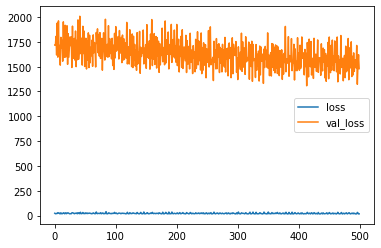

In [ ]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.mse)

## Batchnormalization, Activation 추가

In [ ]:
import tensorflow as tf
import pandas as pd

boston = pd.read_csv("https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv")
print(boston.columns)
x_boston = boston.drop(['medv'], axis=1)
y_boston = boston[['medv']]
print(x_boston.shape, y_boston.shape)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 13) (506, 1)


In [ ]:
X = tf.keras.Input(shape=[13])

H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.Model(X, Y)
model.compile(optimizer='adam', loss=tf.keras.losses.mse)

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=1000, validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 0s 64ms/step - loss: 4.0007 - val_loss: 94.6856
Epoch 2/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.4242 - val_loss: 95.5211
Epoch 3/1000
3/3 [==============================] - 0s 22ms/step - loss: 3.1664 - val_loss: 94.8498
Epoch 4/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.4057 - val_loss: 93.1639
Epoch 5/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.8173 - val_loss: 90.8044
Epoch 6/1000
3/3 [==============================] - 0s 24ms/step - loss: 3.2101 - val_loss: 89.7682
Epoch 7/1000
3/3 [==============================] - 0s 23ms/step - loss: 3.6329 - val_loss: 87.3575
Epoch 8/1000
3/3 [==============================] - 0s 22ms/step - loss: 4.2325 - val_loss: 86.1275
Epoch 9/1000
3/3 [==============================] - 0s 34ms/step - loss: 3.6340 - val_loss: 85.0561
Epoch 10/1000
3/3 [==============================] - 0s 18ms/step - loss: 3.8530 - val_loss: 86.1311